## Final Project Submission

Please fill out:
* Student name: Brian Gitei Njuguna
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


# Introduction

## Overview

The project aims to use data analysis to help Microsoft enter and succeed in the movie industry by identifying the best types of films to create through exploratory data analysis.

## Objectives

### General Objectives

Analyze successful movie genres at the box office and using findings to decide which types of movies to make.

### Specific Objectives

* Loading datasets into pandas
* Retrieving data from a DataFrame
* Data preparation annd cleaning
* Exploratory analysis
* Data visualization

## Questions to be researched

This analysis answers the following questions:

 * What are the most popular movie genres in the box office?
 * What are the most popular studios in terms of movie ratings?
 * What are the movies with the highest worldwide gross?
 * Does popularity affect the total gross?
 * Does the budget affect revenue?
 * Does the ratings affect revenue?
 
# Data Processing
 
## Datasets
 
The datasets are stored in the zippedData folder. The data sources are: 

   1. bom.movie_gross.csv (Box Office MojoLinks)
   2. im.db (IMDBLinks)
   3. rt.movie_info.tsv (Rotten TomatoesLinks)
   4. tmdb.movies.csv (TheMovieDBLinks)
   5. tn.movie_budgets.csv (The Numbers)
    
## Importing necessary libraries


In [299]:
# Your code here - remember to use markdown cells for comments as well!
# importing libraries
import pandas as pd
import sqlite3
import csv
import numpy as np
from datetime import datetime


In [300]:
#importing data visualization tools
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

### Loading datasets
To load datasets use the following:
    
 1. movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv')
 2. movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
 3. tmdb = pd.read_csv('zippedData/tmdb.movies.csv',index_col=0)
 4. reviews = pd.read_csv('zippedData/rt.reviews.tsv',     delimiter='\t',encoding='unicode_escape')
 5. conn = sqlite3.connect('zippedData/im.db')
 6. movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter ='\t', encoding='unicode_escape' )
 
 ## Explore the datasets
 
 ### Numbers dataset
 
 This gives us information on the budget and the profit or loss made.

In [301]:
#Loading data from tn.movie_budgets.csv into a dataframe
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv')

#Cast to numeric data type to make sure the figures are floats not strings.
movies_budget['production_budget'] = movies_budget['production_budget'].replace('[^.0-9]', '', regex=True).astype('float32')
movies_budget['domestic_gross'] = movies_budget['domestic_gross'].replace('[^.0-9]', '', regex=True).astype('float32')
movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].replace('[^.0-9]', '',regex = True).astype('float64')

movies_budget.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09


In [302]:
movies_budget.shape

(5782, 6)

The movie budget Data frame has 5,782 rows and 6 columns.

In [303]:
#To check the data types of the columns.
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float32
 4   domestic_gross     5782 non-null   float32
 5   worldwide_gross    5782 non-null   float64
dtypes: float32(2), float64(1), int64(1), object(2)
memory usage: 226.0+ KB


In [304]:
# Check if there's any null figures in the dataset and if so how many.
movies_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

To find out the movies budget, we get the international gross by subtracting the domestic gross from the worldwide gross.

In [305]:
movies_budget['international_gross'] = movies_budget['worldwide_gross'] - movies_budget['domestic_gross']
cols = list(movies_budget.columns)

movies_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,6.540000e+08
8,9,"Nov 17, 2017",Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08
9,10,"Nov 6, 2015",Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08


The release date is an object, in order to filter the years convert to date time type.

In [306]:
#converting object to dateTime
movies_budget['release_date'] = pd.to_datetime(movies_budget['release_date'], errors='coerce')
movies_budget['year'] = movies_budget['release_date'].dt.strftime('%Y')
movies_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,6.540000e+08,2007
8,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08,2017
9,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08,2015


In [307]:
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5782 non-null   int64         
 1   release_date         5782 non-null   datetime64[ns]
 2   movie                5782 non-null   object        
 3   production_budget    5782 non-null   float32       
 4   domestic_gross       5782 non-null   float32       
 5   worldwide_gross      5782 non-null   float64       
 6   international_gross  5782 non-null   float64       
 7   year                 5782 non-null   object        
dtypes: datetime64[ns](1), float32(2), float64(2), int64(1), object(2)
memory usage: 316.3+ KB


## Filtering the Data

In this step, we'll remove the rows that do not have values for the domestic, international, and worldwide gross.

In [308]:
movies_budget.sort_values('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year
5037,38,2019-04-23,Living Dark: The Story of Ted the Caver,1750000.0,0.0,0.000000e+00,0.000000e+00,2019
3975,76,2015-05-15,Pound of Flesh,7500000.0,0.0,0.000000e+00,0.000000e+00,2015
4627,28,2011-06-28,2:13,3500000.0,0.0,0.000000e+00,0.000000e+00,2011
4628,29,2013-01-29,"Batman: The Dark Knight Returns, Part 2",3500000.0,0.0,0.000000e+00,0.000000e+00,2013
3947,48,2019-06-21,Burn Your Maps,8000000.0,0.0,0.000000e+00,0.000000e+00,2019
...,...,...,...,...,...,...,...,...
33,34,2015-06-12,Jurassic World,215000000.0,652270656.0,1.648855e+09,9.965842e+08,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,1.116649e+09,2015
42,43,1997-12-19,Titanic,200000000.0,659363968.0,2.208208e+09,1.548844e+09,1997


In [309]:
#drop all all rows whose gross values are zero
movies_budget_drop = movies_budget[(movies_budget['domestic_gross'] == 0) & (movies_budget['worldwide_gross'] == 0)]
movies_budget.drop(movies_budget_drop.index, axis=0)
movies_budget.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08,2017


In order to get relevant budgeting information, filter the years to get only the data from 2015


In [310]:
#convert from object to string
movies_budget['year'] = movies_budget['year'].astype(int)

In [311]:
#drop rows which are not between the years 2015 and 2022
drop_rows=  movies_budget[(movies_budget['year'] <= 2014)]
movies_budget.drop(drop_rows.index, axis=0)
movies_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   5782 non-null   int64         
 1   release_date         5782 non-null   datetime64[ns]
 2   movie                5782 non-null   object        
 3   production_budget    5782 non-null   float32       
 4   domestic_gross       5782 non-null   float32       
 5   worldwide_gross      5782 non-null   float64       
 6   international_gross  5782 non-null   float64       
 7   year                 5782 non-null   int32         
dtypes: datetime64[ns](1), float32(2), float64(2), int32(1), int64(1), object(1)
memory usage: 293.7+ KB


In [312]:
movies_budget['year'].value_counts()

2015    338
2010    274
2008    264
2006    260
2014    255
       ... 
1947      1
1927      1
1941      1
1937      1
1915      1
Name: year, Length: 96, dtype: int64

In [313]:
# To generate descriptive statistics.
movies_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,international_gross,year
count,5782.000000,5782.0,5782.0,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,31587756.0,41873328.0,9.148746e+07,4.961413e+07,2003.967139
std,28.821076,41812076.0,68240600.0,1.747200e+08,1.131192e+08,12.724386
min,1.000000,1100.0,0.0,0.000000e+00,-3.000000e+00,1915.000000
25%,25.000000,5000000.0,1429534.5,4.125415e+06,0.000000e+00,2000.000000
50%,50.000000,17000000.0,17225946.0,2.798445e+07,5.701764e+06,2007.000000
75%,75.000000,40000000.0,52348661.0,9.764584e+07,4.682110e+07,2012.000000
max,100.000000,425000000.0,936662208.0,2.776345e+09,2.015838e+09,2020.000000


Finding the profits of the movies based on the production budget and the world wide gross.

In [314]:
movies_budget['profit/loss'] = (movies_budget['worldwide_gross'] - movies_budget['production_budget'])
movies_budget['profit/loss'] = movies_budget['profit/loss'].astype(int)      
movies_budget['profit/loss'].head()

0   -2147483648
1     635063875
2    -200237650
3    1072413963
4     999721747
Name: profit/loss, dtype: int32

In [315]:
movies_budget.shape

(5782, 9)

In [316]:
movies_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,international_gross,year,profit/loss
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2.015838e+09,2009,-2147483648
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08,2011,635063875
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,1.070000e+08,2019,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,6.965404e+08,2017,999721747
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,0.000000e+00,2018,-7000
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1.920130e+05,1999,234495
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,0.000000e+00,2005,-3662
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.000000e+00,2015,-1400


### Box office Mojo Dataset

The bom dataset gives information on the domestic gross values and the foreign gross.

In [317]:
#previewing the bom dataset
movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
movies_gross.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [318]:
#find out the shape of the dataset
movies_gross.shape

(3387, 5)

In [319]:
#extracting unique values from column year.
movies_gross['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [320]:
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [321]:
#To check if there's any null values and howm many rows per column.
movies_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [322]:
#drop the rows with null values
movies_gross.dropna(subset=['foreign_gross','domestic_gross'])
movies_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [323]:
movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### The MovieDB dataset

The tmdb.movies dataset presents data on how popular movies are in relation to the languages they are originally produced in.

In [324]:
tmdb = pd.read_csv('zippedData/tmdb.movies.csv' ,index_col=0)
tmdb.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [325]:
# Total count of movies in the top five specific languages
tmdb['original_language'].value_counts().head(5)

en    23291
fr      507
es      455
ru      298
ja      265
Name: original_language, dtype: int64

In [326]:
tmdb.shape

(26517, 9)

The tmdb database contains 26,517 rows and 9 columns.


In [327]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [328]:
# Check if dataset has duplicates
tmdb.duplicated().sum()

1020

In [329]:
# drop all duplicate rows based on the titles columns
tmdb = tmdb.drop_duplicates(subset = ['title','original_title'], keep = 'first')
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24842 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          24842 non-null  object 
 1   id                 24842 non-null  int64  
 2   original_language  24842 non-null  object 
 3   original_title     24842 non-null  object 
 4   popularity         24842 non-null  float64
 5   release_date       24842 non-null  object 
 6   title              24842 non-null  object 
 7   vote_average       24842 non-null  float64
 8   vote_count         24842 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [330]:
# Check to see whether all duplicates have been removed.
tmdb.duplicated().sum()

0

In [331]:
# Highest popularity value
tmdb['popularity'].max()

80.773

In [332]:
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### Rotten Tomatoes dataset


In [333]:
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t')
rt_info.tail(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1550,1990,A hard-working Sicilian heads for Switzerland ...,R,Art House and International|Comedy|Drama,Franco Brusati,Nino Manfredi|Franco Brusati|Iaia Fiastri,"Jun 1, 1974","May 2, 2005",NaN,NaN,112 minutes,NaN
1551,1991,Popular rap group Run DMC stars as a trio of p...,R,Action and Adventure|Drama,Rick Rubin,Rick Rubin|Ric Menello,NaN,NaN,NaN,NaN,92 minutes,NaN
1552,1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",NaN,NaN,116 minutes,NaN
1553,1993,A former child actor turned talent agent is hi...,PG,Comedy,James Lapine,NaN,"Jun 4, 1993","Apr 8, 2003",NaN,NaN,95 minutes,NaN
1554,1995,"Special government agent James West, long on c...",PG-13,Action and Adventure|Comedy|Western,Barry Sonnenfeld,NaN,"Jun 30, 1999","Nov 30, 1999",NaN,NaN,107 minutes,Warner Bros. Pictures
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [334]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [335]:
rt_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [336]:
rt_info.duplicated().sum()

0

In [337]:
rt_info.dropna(inplace = True)

In [338]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [339]:
rt_info.shape

(235, 12)

In [340]:
rt_info["runtime"]

1       108 minutes
6        82 minutes
7       123 minutes
15      108 minutes
18      127 minutes
           ...     
1530    126 minutes
1537    123 minutes
1541    119 minutes
1542    129 minutes
1545     98 minutes
Name: runtime, Length: 235, dtype: object

### IMDB dataset

In [341]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

#### Find the table names in im.db

In [342]:
cur.execute("""SELECT name 
                FROM sqlite_master WHERE type = 'table';
                """)
# Fetch all the results and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

Im.db has 8 tables. The movie_ratings and movie_basics are most importamt to our analysis since they help gain information on the highly rated genres.

In [343]:
moviebasics = pd.read_sql_query("""
SELECT * 
FROM movie_basics
;""",conn)

moviebasics.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [344]:
movieratings = pd.read_sql_query("""
SELECT * 
FROM movie_ratings
;""",conn)

movieratings.head(10)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [345]:
ratings = pd.read_sql_query("""
SELECT primary_title, movie_id, start_year, runtime_minutes, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
LIMIT 10
;""", conn)

ratings

,primary_title,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,tt0066787,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,tt0069049,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,tt0069204,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,tt0112502,2017,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,tt0137204,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,tt0146592,2010,136.0,Drama,6.8,451
8,So Much for Justice!,tt0154039,2010,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,tt0159369,2013,180.0,Documentary,7.6,53


In [346]:
movie_akas = pd.read_sql_query("""
SELECT * 
FROM movie_akas
;""",conn)

movie_akas.head(10)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [347]:
#find the languages in which the movies were made in.
movie_akas['language'].unique()
movie_akas['language'].value_counts().head(10)

en     22895
tr      3847
bg      3609
fr      3576
he      2680
sv       965
cmn      727
fa       482
hi       307
yue      286
Name: language, dtype: int64

# Merging Datasets

In [348]:
#renaming columns for merging

movies_gross.rename(columns={'title':'movie'}, inplace=True)
tmd.rename(columns={'original_title':'movie'}, inplace=True)
moviebasics.rename(columns={'original_title':'movie'},inplace=True)

In [349]:
#merging the movie_budget dataframe and movie_gross 

df_budget_and_gross = movies_budget.merge(movies_gross, how = 'inner', on ='movie')
df_budget_and_gross.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,international_gross,year_x,profit/loss,studio,domestic_gross_y,foreign_gross,year_y
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08,2011,635063875,BV,241100000.0,804600000,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015,1072413963,BV,459000000.0,946400000,2015
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018,1748134200,BV,678800000.0,"1,369.5",2018
3,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08,2017,355945209,WB,229000000.0,428900000,2017
4,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08,2015,579620923,Sony,200100000.0,680600000,2015


In [350]:
df_budget_and_gross.shape

(1247, 13)

In [351]:
movies_budget.shape

(5782, 9)

In [352]:
movies_gross.shape

(3387, 5)

Merging tmdb dataframe with the moviebasics table

In [353]:
popularity_ratings_df = tmd.merge(moviebasics, how = 'inner', on ='movie')

In [354]:
popularity_ratings_df.shape

(17891, 14)

In [355]:
final_df = pd.merge(df_budget_and_gross,popularity_ratings_df, how = 'inner', on ='movie')
final_df.head(5)

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,international_gross,year_x,profit/loss,studio,...,popularity,release_date_y,title,vote_average,vote_count,movie_id,primary_title,start_year,runtime_minutes,genres
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,8.046000e+08,2011,635063875,BV,...,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,9.440081e+08,2015,1072413963,BV,...,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,1.369319e+09,2018,1748134200,BV,...,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
3,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,4.269209e+08,2017,355945209,WB,...,34.953,2017-11-17,Justice League,6.2,7510,tt0974015,Justice League,2017,120.0,"Action,Adventure,Fantasy"
4,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,6.795467e+08,2015,579620923,Sony,...,30.318,2015-11-06,Spectre,6.4,6719,tt2379713,Spectre,2015,148.0,"Action,Adventure,Thriller"


In [356]:
final_df.shape

(1515, 26)

In [357]:
#finding the column names

list(final_df.columns)

['id_x',
 'release_date_x',
 'movie',
 'production_budget',
 'domestic_gross_x',
 'worldwide_gross',
 'international_gross',
 'year_x',
 'profit/loss',
 'studio',
 'domestic_gross_y',
 'foreign_gross',
 'year_y',
 'genre_ids',
 'id_y',
 'original_language',
 'popularity',
 'release_date_y',
 'title',
 'vote_average',
 'vote_count',
 'movie_id',
 'primary_title',
 'start_year',
 'runtime_minutes',
 'genres']

In [358]:
# dropping the columns that are not useful for this analysis

final_df.drop(columns=['id_x', 'release_date_x', 'domestic_gross_x','year_x','domestic_gross_y', 'year_y', 'genre_ids', 'id_y', 'release_date_y','movie_id','primary_title','start_year'],inplace= True)
final_df.head(5)

,movie,production_budget,worldwide_gross,international_gross,profit/loss,studio,foreign_gross,original_language,popularity,title,vote_average,vote_count,runtime_minutes,genres
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,8.046000e+08,635063875,BV,804600000,en,30.579,Pirates of the Caribbean: On Stranger Tides,6.4,8571,136.0,"Action,Adventure,Fantasy"
1,Avengers: Age of Ultron,330600000.0,1.403014e+09,9.440081e+08,1072413963,BV,946400000,en,44.383,Avengers: Age of Ultron,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
2,Avengers: Infinity War,300000000.0,2.048134e+09,1.369319e+09,1748134200,BV,"1,369.5",en,80.773,Avengers: Infinity War,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
3,Justice League,300000000.0,6.559452e+08,4.269209e+08,355945209,WB,428900000,en,34.953,Justice League,6.2,7510,120.0,"Action,Adventure,Fantasy"
4,Spectre,300000000.0,8.796209e+08,6.795467e+08,579620923,Sony,680600000,en,30.318,Spectre,6.4,6719,148.0,"Action,Adventure,Thriller"


In [359]:
# show the first 10 columns

final_df.head(10)

,movie,production_budget,worldwide_gross,international_gross,profit/loss,studio,foreign_gross,original_language,popularity,title,vote_average,vote_count,runtime_minutes,genres
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,8.046000e+08,635063875,BV,804600000,en,30.579,Pirates of the Caribbean: On Stranger Tides,6.4,8571,136.0,"Action,Adventure,Fantasy"
1,Avengers: Age of Ultron,330600000.0,1.403014e+09,9.440081e+08,1072413963,BV,946400000,en,44.383,Avengers: Age of Ultron,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
2,Avengers: Infinity War,300000000.0,2.048134e+09,1.369319e+09,1748134200,BV,"1,369.5",en,80.773,Avengers: Infinity War,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
3,Justice League,300000000.0,6.559452e+08,4.269209e+08,355945209,WB,428900000,en,34.953,Justice League,6.2,7510,120.0,"Action,Adventure,Fantasy"
4,Spectre,300000000.0,8.796209e+08,6.795467e+08,579620923,Sony,680600000,en,30.318,Spectre,6.4,6719,148.0,"Action,Adventure,Thriller"
5,The Dark Knight Rises,275000000.0,1.084439e+09,6.363000e+08,809439099,WB,636800000,en,26.220,The Dark Knight Rises,7.7,13933,164.0,"Action,Thriller"
6,Solo: A Star Wars Story,275000000.0,3.931513e+08,1.793838e+08,118151347,BV,179200000,en,29.502,Solo: A Star Wars Story,6.6,3838,135.0,"Action,Adventure,Fantasy"
7,The Lone Ranger,275000000.0,2.600021e+08,1.707000e+08,-14997885,BV,171200000,en,12.482,The Lone Ranger,6.0,3789,150.0,"Action,Adventure,Western"
8,John Carter,275000000.0,2.827781e+08,2.097194e+08,7778100,BV,211100000,en,18.549,John Carter,6.1,3338,132.0,"Action,Adventure,Sci-Fi"
9,Tangled,260000000.0,5.864772e+08,3.856553e+08,326477240,BV,391000000,en,21.511,Tangled,7.5,6407,100.0,"Adventure,Animation,Comedy"


In [360]:
final_df.shape

(1515, 14)

In [362]:
final_df.drop(columns=["title","original_language"], inplace = True)
final_df.head()

,movie,production_budget,worldwide_gross,international_gross,profit/loss,studio,foreign_gross,popularity,vote_average,vote_count,runtime_minutes,genres
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,8.046000e+08,635063875,BV,804600000,30.579,6.4,8571,136.0,"Action,Adventure,Fantasy"
1,Avengers: Age of Ultron,330600000.0,1.403014e+09,9.440081e+08,1072413963,BV,946400000,44.383,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
2,Avengers: Infinity War,300000000.0,2.048134e+09,1.369319e+09,1748134200,BV,"1,369.5",80.773,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
3,Justice League,300000000.0,6.559452e+08,4.269209e+08,355945209,WB,428900000,34.953,6.2,7510,120.0,"Action,Adventure,Fantasy"
4,Spectre,300000000.0,8.796209e+08,6.795467e+08,579620923,Sony,680600000,30.318,6.4,6719,148.0,"Action,Adventure,Thriller"


In [363]:
final_df.shape

(1515, 12)

In [364]:
# To see number of unique elements in each column of the DataFrame.

final_df.nunique()

movie                  1129
production_budget       213
worldwide_gross        1136
international_gross    1122
profit/loss            1138
studio                   85
foreign_gross           751
popularity             1073
vote_average             50
vote_count              978
runtime_minutes         131
genres                  230
dtype: int64

In [365]:
# Check for null values

final_df.isna().sum()

movie                    0
production_budget        0
worldwide_gross          0
international_gross      0
profit/loss              0
studio                   0
foreign_gross          209
popularity               0
vote_average             0
vote_count               0
runtime_minutes         94
genres                  23
dtype: int64

In [366]:
# Check for duplicates

final_df.duplicated(["movie"]).sum()

386

In [367]:
# Drop all duplicates

final_df.drop_duplicates(subset= ['movie'] ,inplace=True)

In [368]:
final_df.shape

(1129, 12)

In [369]:
final_df.dropna(subset = ["foreign_gross" , "genres"], inplace=True)
final_df.isna().sum()

movie                   0
production_budget       0
worldwide_gross         0
international_gross     0
profit/loss             0
studio                  0
foreign_gross           0
popularity              0
vote_average            0
vote_count              0
runtime_minutes        12
genres                  0
dtype: int64

In [370]:
final_df.shape

(980, 12)

In [371]:
# Export the combined Dataframe to a csv file

final_df.to_csv('Cleaned Microsoft Movies Data.csv')

# Exploratory Data Analysis

## 1. What are the most popular genres in the box office?

In [372]:
popular = final_df.sort_values('popularity', ascending = False)

In [373]:
# accessing the individual genre element for each row.

top_genres = [genre.split(',') for genre in popular['genres']]

top_genres

[['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Comedy'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Biography', 'Drama', 'Music'],
 ['Action', 'Mystery', 'Sci-Fi'],
 ['Action', 'Adventure', 'Animation'],
 ['Action', 'Adventure', 'Animation'],
 ['Biography', 'Comedy', 'Drama'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Biography', 'Drama', 'Thriller'],

In [374]:
# accessing a list of all genre elements in the rows.

top_genres_list = [genre for element in top_genres  for genre in element]

top_genres_list 

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Crime',
 'Thriller',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Family',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Biography',
 'Drama',
 'Music',
 'Action',
 'Mystery',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Animation',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Drama',
 'Thriller',


In [375]:
# Get all the unique genres

unique_genres = []

for genre in top_genres_list:
    if genre not in unique_genres:
        unique_genres.append(genre)

In [376]:
unique_genres

['Action',
 'Adventure',
 'Sci-Fi',
 'Crime',
 'Thriller',
 'Fantasy',
 'Comedy',
 'Drama',
 'Mystery',
 'Family',
 'Biography',
 'Music',
 'Animation',
 'Horror',
 'Romance',
 'Documentary',
 'History',
 'Sport',
 'Musical',
 'Western',
 'War']

In [377]:
# Count how many times each specific unique genre appeared. 
# Import Counter

from collections import Counter

count1 = Counter(top_genres_list)
count1

Counter({'Action': 310,
         'Adventure': 267,
         'Sci-Fi': 94,
         'Crime': 156,
         'Thriller': 172,
         'Fantasy': 85,
         'Comedy': 355,
         'Drama': 455,
         'Mystery': 88,
         'Family': 67,
         'Biography': 87,
         'Music': 27,
         'Animation': 81,
         'Horror': 99,
         'Romance': 126,
         'Documentary': 15,
         'History': 30,
         'Sport': 17,
         'Musical': 3,
         'Western': 5,
         'War': 5})

In [378]:
# extract the genres and their corresponding counts from a dictionary and store them in separate lists.
genre = []
count = []

for key, values in count1.items():
    genre.append(key)
    count.append(values)

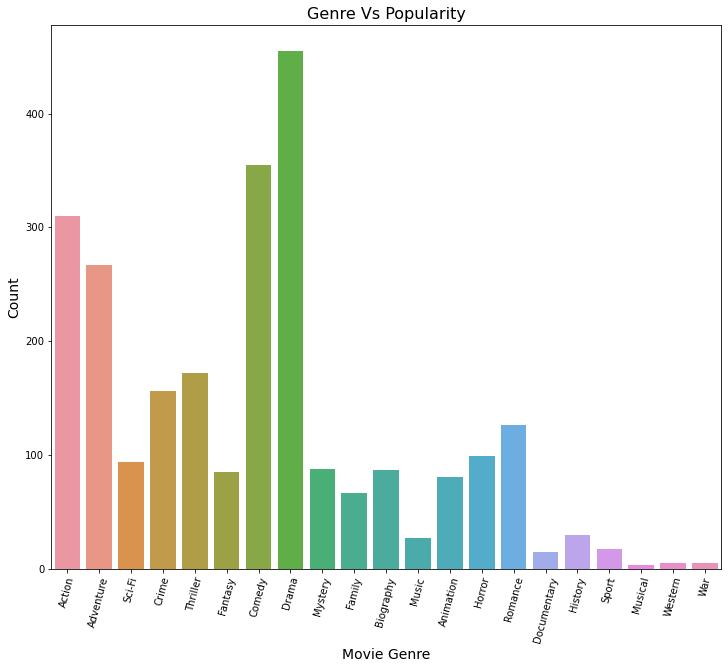

In [379]:
# Plotting the above data to a barplot

fig, ax = plt.subplots(figsize = (12,10))

x = genre
y = count

ax = sns.barplot(x = x, y = y, ax = ax)

# Setting title and axis labels.
ax.set_title('Genre Vs Popularity', fontsize=16)
ax.set_xlabel("Movie Genre",fontsize=14)
ax.set_ylabel("Count", fontsize=14);

# Rotates and saves the plot as an image
ax.set_xticklabels(labels = x, rotation = 75)
fig.savefig('Genres Vs Popularity.png');

From the bar plot above we can conclude that Drama is the most popular genre in the film industry according to the available data.

In [387]:
# Sorting the DataFrame to find popular movies based on their vote_average scores and popularity.

movie_ratings = final_df.sort_values(by = ['popularity', 'vote_average'],ascending=(False, False)).head(10)

movie_ratings = movie_ratings.sort_values('vote_average',ascending=False).reset_index(drop=True)


In [388]:
# Highest rated movies in descending order

movie_ratings.loc[:,['movie','vote_average','studio']]

,movie,vote_average,studio
0,Avengers: Infinity War,8.3,BV
1,Guardians of the Galaxy,7.9,BV
2,Thor: Ragnarok,7.5,BV
3,Blade Runner 2049,7.4,WB
4,Spider-Man: Homecoming,7.4,Sony
5,The Hobbit: The Battle of the Five Armies,7.3,WB (NL)
6,Avengers: Age of Ultron,7.3,BV
7,John Wick,7.2,LG/S
8,Ant-Man and the Wasp,7.0,BV
9,Fantastic Beasts: The Crimes of Grindelwald,6.9,WB


In [389]:
# Showing all the studios producing movies in the dataframe
final_df['studio'].unique()

array(['BV', 'WB', 'Sony', 'WB (NL)', 'Uni.', 'Par.', 'Fox', 'P/DW',
       'STX', 'LGF', 'LG/S', 'TriS', 'Wein.', 'MBox', 'Free', 'Rela.',
       'EOne', 'FD', 'ORF', 'Sum.', 'SGem', 'Focus', 'Annapurna',
       'W/Dim.', 'Studio 8', 'MGM', 'MNE', 'Strand', 'CBS', 'IFC', 'RTWC',
       'FoxS', 'RAtt.', 'SPC', 'GrtIndia', 'BST', 'VE', 'EC', 'BG',
       'Over.', 'A24', 'Amazon', 'OMNI/FSR', 'Magn.', 'Mira.', 'CE',
       'Global Road', 'ATO', 'FCW', 'Neon', 'ParV', 'LD', 'Gold.', 'App.',
       'Relbig.', 'Osci.', 'Jan.', 'Affirm', '3D', 'BH Tilt', 'P4',
       'Drft.', 'Viv.', 'PFR', 'Anch.'], dtype=object)

## 2. What are the most popular studios in terms of movie ratings?

In [390]:
# sorting values to find movies with the highest worldwide gross.

highest_gross = final_df.sort_values('worldwide_gross', ascending = False).head(10)
highest_gross.reset_index(drop=True)

,movie,production_budget,worldwide_gross,international_gross,profit/loss,studio,foreign_gross,popularity,vote_average,vote_count,runtime_minutes,genres
0,Avengers: Infinity War,300000000.0,2.048134e+09,1.369319e+09,1748134200,BV,"1,369.5",80.773,8.3,13948,149.0,"Action,Adventure,Sci-Fi"
1,Jurassic World,215000000.0,1.648855e+09,9.965842e+08,1433854864,Uni.,"1,019.4",20.709,6.6,14056,124.0,"Action,Adventure,Sci-Fi"
2,Avengers: Age of Ultron,330600000.0,1.403014e+09,9.440081e+08,1072413963,BV,946400000,44.383,7.3,13457,141.0,"Action,Adventure,Sci-Fi"
3,Black Panther,200000000.0,1.348258e+09,6.481986e+08,1148258224,BV,646900000,2.058,5.1,11,134.0,"Action,Adventure,Sci-Fi"
4,Jurassic World: Fallen Kingdom,170000000.0,1.305773e+09,8.880531e+08,1135772799,Uni.,891800000,34.958,6.5,5995,128.0,"Action,Adventure,Sci-Fi"
5,Frozen,150000000.0,1.272470e+09,8.717319e+08,1122469910,BV,875700000,9.678,5.8,987,93.0,"Adventure,Drama,Sport"
6,Incredibles 2,200000000.0,1.242521e+09,6.339390e+08,1042520711,BV,634200000,36.286,7.6,6354,118.0,"Action,Adventure,Animation"
7,The Fate of the Furious,250000000.0,1.234846e+09,1.009081e+09,984846267,Uni.,"1,010.0",28.668,6.9,6335,136.0,"Action,Crime,Thriller"
8,Minions,74000000.0,1.160336e+09,8.242904e+08,1086336173,Uni.,823400000,9.338,6.4,7343,91.0,"Adventure,Animation,Comedy"
9,Aquaman,160000000.0,1.146895e+09,8.118328e+08,986894640,WB,812700000,38.102,6.8,6155,143.0,"Action,Adventure,Fantasy"


In [391]:
# Movies with the highest worldwide gross and studio that made the movie.

highest_gross[["movie","worldwide_gross","studio"]]

,movie,worldwide_gross,studio
2,Avengers: Infinity War,2.048134e+09,BV
21,Jurassic World,1.648855e+09,Uni.
1,Avengers: Age of Ultron,1.403014e+09,BV
33,Black Panther,1.348258e+09,BV
80,Jurassic World: Fallen Kingdom,1.305773e+09,Uni.
107,Frozen,1.272470e+09,BV
34,Incredibles 2,1.242521e+09,BV
15,The Fate of the Furious,1.234846e+09,Uni.
285,Minions,1.160336e+09,Uni.
96,Aquaman,1.146895e+09,WB


In [392]:
import matplotlib.ticker as mticker

<ipython-input-401-0b75127cf352>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels = sorted(y),fontsize=14)


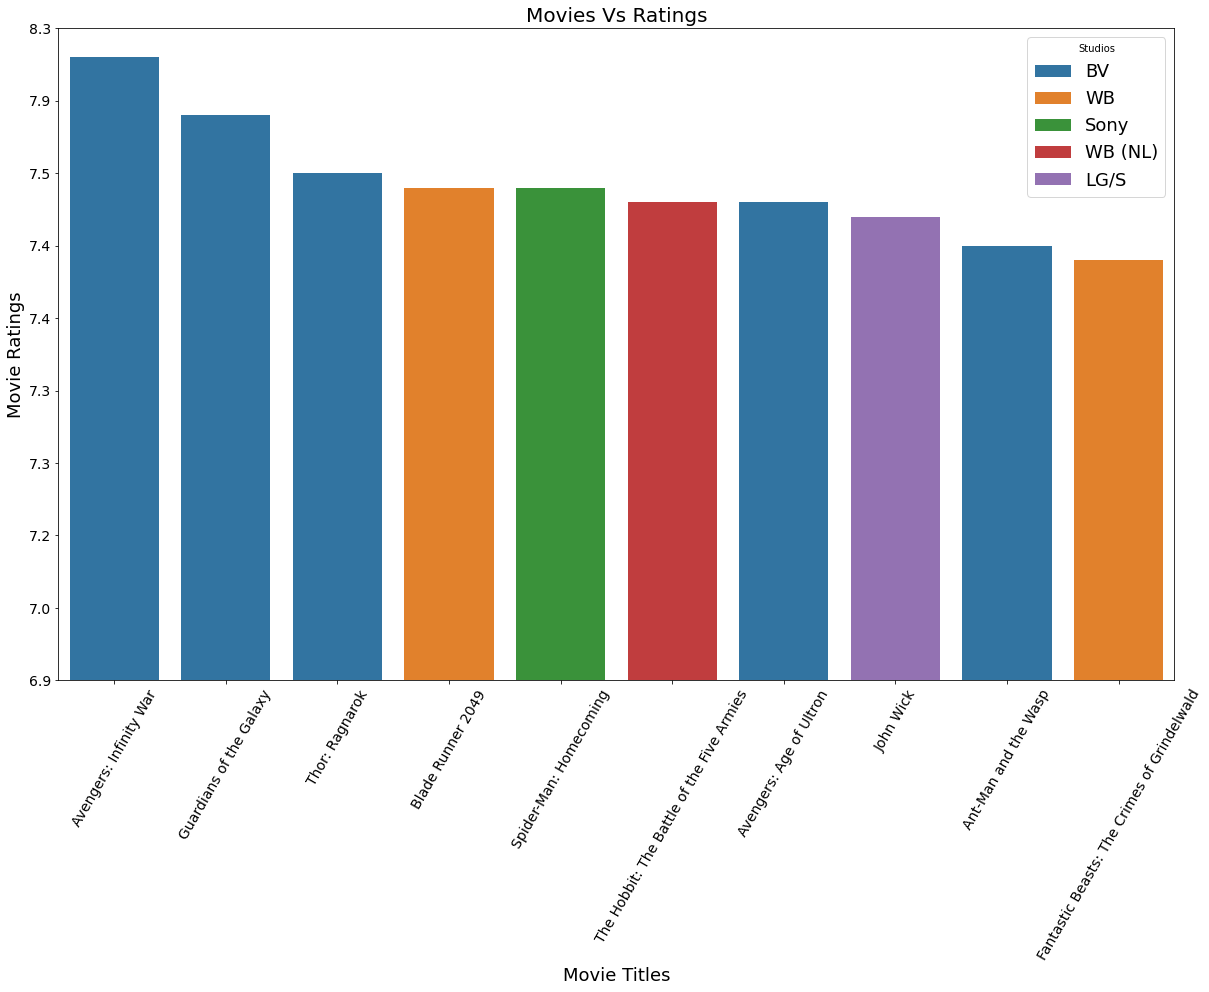

In [401]:
# plotting a bar graph for the above data

fig, ax1= plt.subplots(figsize=(20,12))

x = list(movie_ratings["movie"].values)
y = movie_ratings["vote_average"]

ax1 = sns.barplot(data = movie_ratings, x = "movie", y = "vote_average", hue = "studio", ax = ax1, dodge=False)

ax1.set_title('Movies Vs Ratings', fontsize=20)
ax1.set_xlabel("Movie Titles",fontsize=18)
ax1.set_ylabel("Movie Ratings", fontsize=18)
ax1.legend(title='Studios', fontsize=18, loc=1)
ax1.set_xticklabels(labels = x, rotation = 60,fontsize=14)
ax1.set_yticklabels(labels = sorted(y),fontsize=14)

ax1.set_ylim(4, 8.5)
fig.savefig('Movies Vs Ratings per studio.png')

From the graph above it is clear that BV produces the movies with the highest ratings, boasting of the top three highest rated movies.

## 3. What are the movies with the highest worldwide gross?

<ipython-input-399-b1a73251f81b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels = sorted(y),fontsize=14)


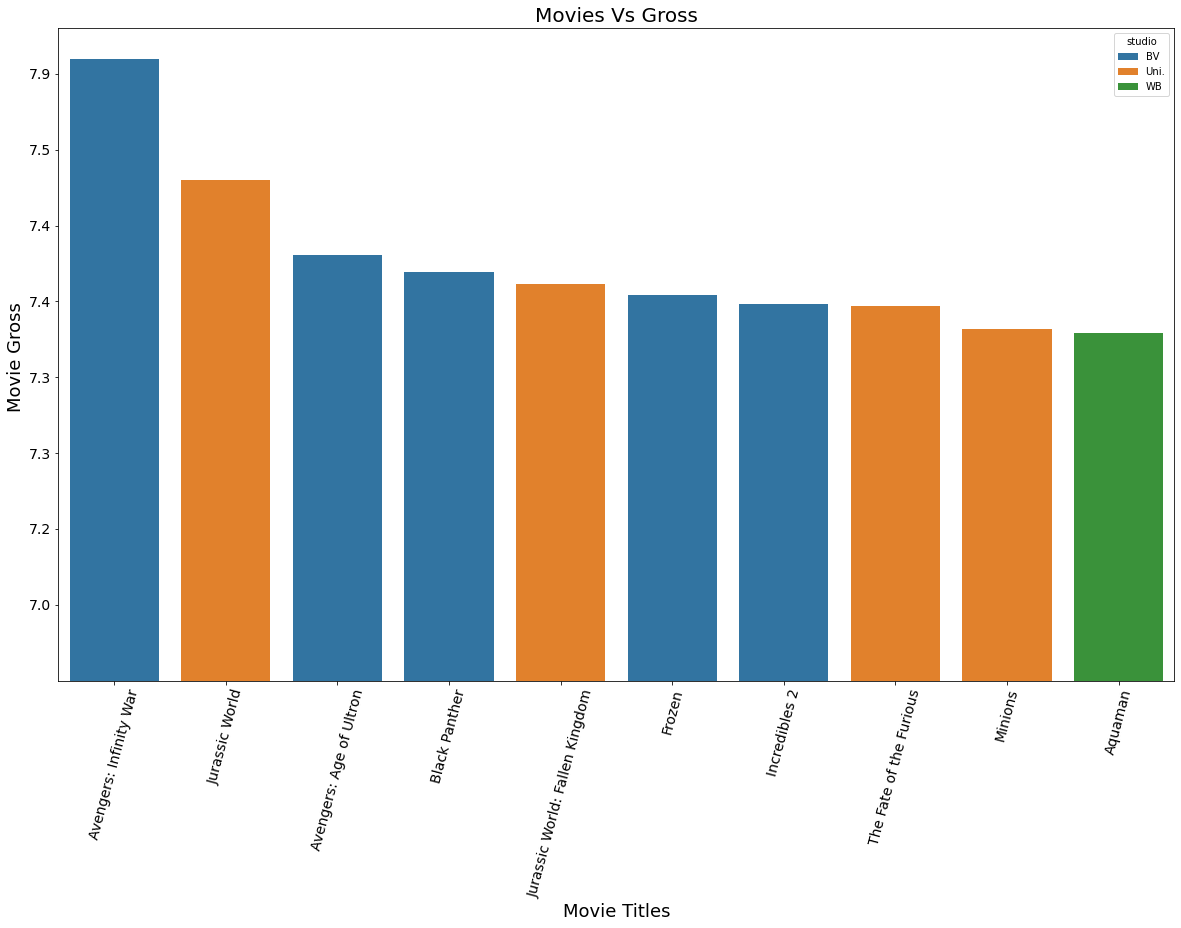

In [399]:
# Plotting a bar graph showing the movies with the highest gross and which studio produced it.

fig, ax2= plt.subplots(figsize=(20,12))
ax2 = sns.barplot(data = highest_gross, x = 'movie', y = 'worldwide_gross',hue = 'studio', ax = ax2, dodge=False)

labels = list(highest_gross['movie'])
ax2.set_title('Movies Vs Gross', fontsize=20)
ax2.set_xlabel("Movie Titles",fontsize=18)
ax2.set_ylabel("Movie Gross ", fontsize=18)
ax2.set_ylim(1000)

ax2.set_xticklabels(labels = labels, rotation = 75,fontsize=14)
ax2.set_yticklabels(labels = sorted(y),fontsize=14)

fig.savefig('Movies Vs Worldwide gross.png');

The bargraph above shows the highest grossing movies and their corresponding studios. BV has the highest grossing movies and half of the top ten movies are from BV.

## 4. Does popularity affect the total gross?

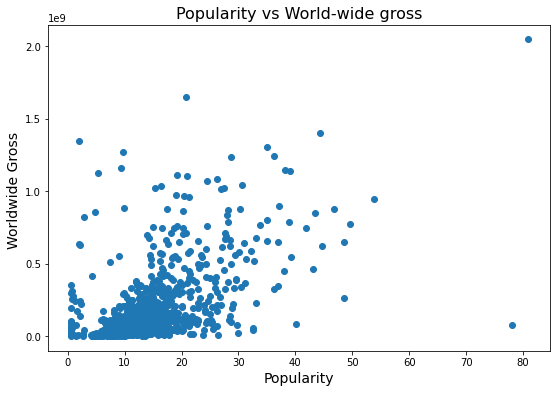

In [402]:
# plotting a scatterplot to show relationship between popularity and worldwide gross.

fig, ax= plt.subplots(figsize=(9,6))

x = final_df['popularity']
y = final_df['worldwide_gross']

ax.scatter(x,y)

ax.set_title('Popularity vs World-wide gross', fontsize=16)
ax.set_xlabel("Popularity",fontsize=14)
ax.set_ylabel("Worldwide Gross ", fontsize=14)
fig.savefig('Popularity vs Worldwide gross.png');

According to the scatter graph above we can conclude that theres a weak positive relationship between popularity and Worldwide gross.

## 5. Does the budget affect the revenue?

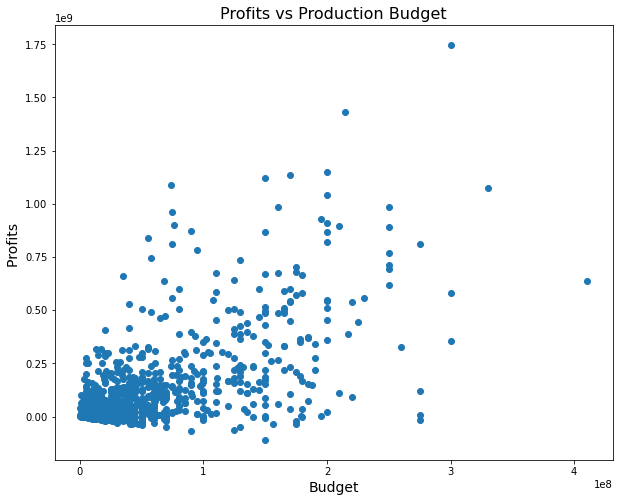

In [403]:
# plotting a scatterplot showing relationship between budget and revenue.

fig, ax= plt.subplots(figsize=(10,8))

x = final_df['production_budget']
y = final_df['profit/loss']

ax.scatter(x,y)

ax.set_title('Profits vs Production Budget', fontsize=16)
ax.set_xlabel("Budget",fontsize=14)
ax.set_ylabel("Profits ", fontsize=14)
fig.savefig('Budget vs Revenue.png');

The scatter graph above shows that there's a weak positive relationship between the budget and the profits of producing a movie.

## 6. Does the rating affect revenue?

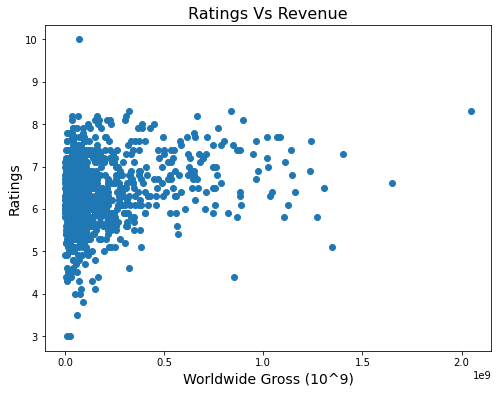

In [404]:
# plotting a scatterplot showing relationship between ratings and revenues.

fig, ax= plt.subplots(figsize=(8,6))

x = final_df['worldwide_gross']
y = final_df['vote_average']

ax.scatter(x,y)

ax.set_title('Ratings Vs Revenue', fontsize=16)
ax.set_ylabel("Ratings",fontsize=14)
ax.set_xlabel("Worldwide Gross (10^9)", fontsize=14)
fig.savefig('Ratings vs Revenue.png');

The scatterplot above shows that there's a very slight positive relationship between worldwide gross and the ratings. 